In [1]:
!pip install pyod --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

In [3]:
# Generate a synthetic dataset using pyod
X_train, X_test, y_train, y_test = generate_data(
    n_train=200, n_test=100, n_features=2, contamination=0.1, random_state=42
)

# Convert to DataFrame for better readability
df_train = pd.DataFrame(X_train, columns=["Feature_1", "Feature_2"])
df_train["Anomaly"] = y_train

df_test = pd.DataFrame(X_test, columns=["Feature_1", "Feature_2"])
df_test["Anomaly"] = y_test

# Display the first few rows of the training dataset
print("Training Dataset:")
print(df_train.head())

Training Dataset:
   Feature_1  Feature_2  Anomaly
0   6.433659   5.509168      0.0
1   5.044698   7.708065      0.0
2   5.924536   5.259220      0.0
3   5.293991   5.671262      0.0
4   5.615091   6.130929      0.0


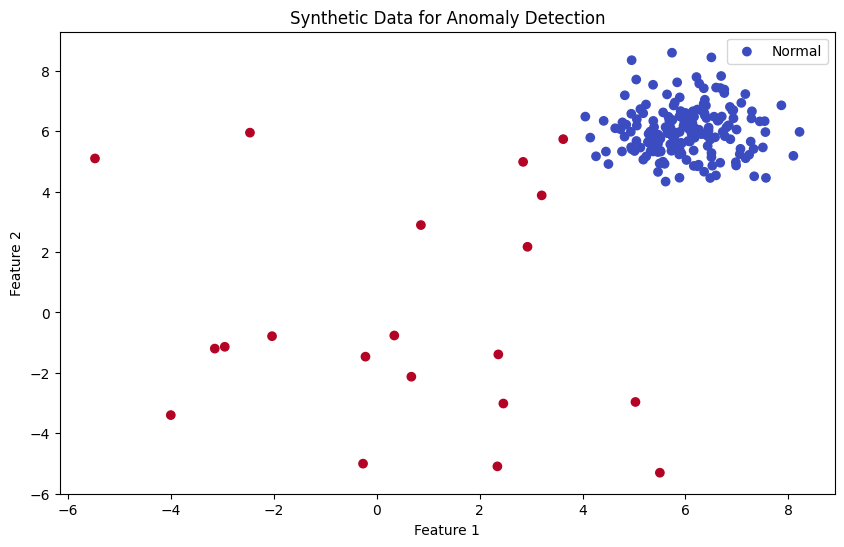

In [4]:
# Visualize the training data
plt.figure(figsize=(10, 6))
plt.scatter(df_train["Feature_1"], df_train["Feature_2"], c=df_train["Anomaly"], cmap="coolwarm", label="Anomaly")
plt.title("Synthetic Data for Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Normal", "Anomaly"])
plt.show()

In [5]:
# Apply Isolation Forest for anomaly detection
clf = IForest(contamination=0.1, random_state=42)
clf.fit(X_train)

# Predict anomalies on the training data
y_pred_train = clf.labels_

# Add predictions to the training DataFrame
df_train["Predicted_Anomaly"] = y_pred_train

# Display the first few rows with predictions
print("Training Dataset with Predicted Anomalies:")
print(df_train.head())

Training Dataset with Predicted Anomalies:
   Feature_1  Feature_2  Anomaly  Predicted_Anomaly
0   6.433659   5.509168      0.0                  0
1   5.044698   7.708065      0.0                  0
2   5.924536   5.259220      0.0                  0
3   5.293991   5.671262      0.0                  0
4   5.615091   6.130929      0.0                  0


In [6]:
# Predict anomalies on the test data
y_pred_test = clf.predict(X_test)

# Add predictions to the test DataFrame
df_test["Predicted_Anomaly"] = y_pred_test

# Display the first few rows of the test dataset with predictions
print("Test Dataset with Predicted Anomalies:")
print(df_test.head())

Test Dataset with Predicted Anomalies:
   Feature_1  Feature_2  Anomaly  Predicted_Anomaly
0   5.301702   5.812698      0.0                  0
1   5.212642   5.608276      0.0                  0
2   5.035673   7.267411      0.0                  0
3   5.396335   5.302087      0.0                  0
4   4.942769   5.384930      0.0                  0


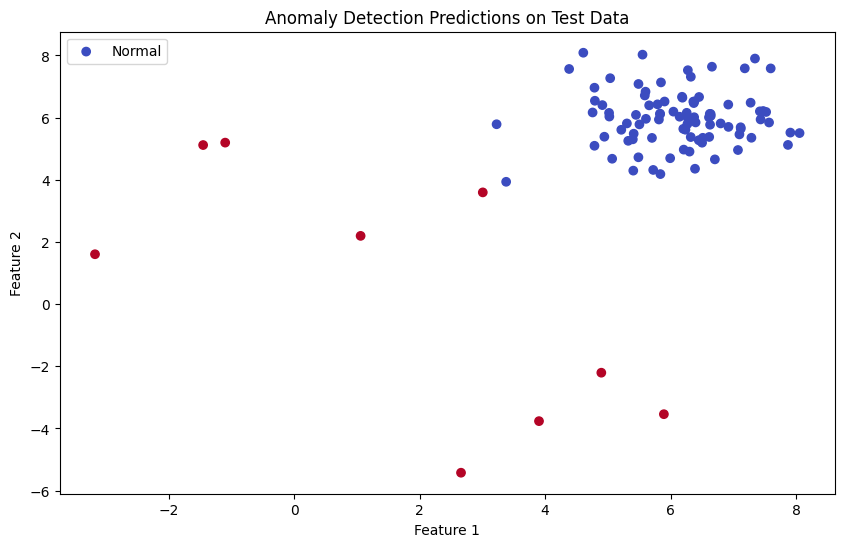

In [7]:
# Visualize the predictions on the test data
plt.figure(figsize=(10, 6))
plt.scatter(df_test["Feature_1"], df_test["Feature_2"], c=df_test["Predicted_Anomaly"], cmap="coolwarm", label="Anomaly")
plt.title("Anomaly Detection Predictions on Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Normal", "Anomaly"])
plt.show()